In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression
import glob
import os
from datetime import datetime as dt
import Setup
# import lightgbm

/Users/calumthompson/Google Drive/Fantasy_football/Setup.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Load most recent dataset


In [2]:
list_of_file_addresses = glob.glob('Data/Input_data/*')
latest_file_address = max(list_of_file_addresses, key=os.path.getctime)
print('Opening ', latest_file_address)

dataset = pd.read_csv(latest_file_address)
dataset.head()

Opening  Data/Input_data/2020-12-03.csv


,FIX_season,FIX_GW,FIX_Fixture_date,player_ID,first_name,second_name,forecast,position,team_ID,FIX_team,FIX_opponent_code,FIX_Opponent,FIX_Home?,difficulty,total_points,cost_today,cost_GW,INCOMING_team_points,INCOMING_opponent_points,INCOMING_team_goals,INCOMING_opponent_goals,INCOMING_points_diff,INCOMING_goals_diff,form,in_dreamteam,LW_cost_GW,L4W_cost_GW,L8W_cost_GW,EWMA_HL1_cost_GW,EWMA_HL2_cost_GW,EWMA_HL4_cost_GW,EWMA_HL8_cost_GW,LW_total_points,L4W_total_points,L8W_total_points,EWMA_HL1_total_points,EWMA_HL2_total_points,EWMA_HL4_total_points,EWMA_HL8_total_points,LW_goals_scored,L4W_goals_scored,L8W_goals_scored,EWMA_HL1_goals_scored,EWMA_HL2_goals_scored,EWMA_HL4_goals_scored,EWMA_HL8_goals_scored,LW_minutes,L4W_minutes,L8W_minutes,EWMA_HL1_minutes,...,EWMA_HL8_goals_conceded,LW_bps,L4W_bps,L8W_bps,EWMA_HL1_bps,EWMA_HL2_bps,EWMA_HL4_bps,EWMA_HL8_bps,LW_assists,L4W_assists,L8W_assists,EWMA_HL1_assists,EWMA_HL2_assists,EWMA_HL4_assists,EWMA_HL8_assists,LW_ict_index,L4W_ict_index,L8W_ict_index,EWMA_HL1_ict_index,EWMA_HL2_ict_index,EWMA_HL4_ict_index,EWMA_HL8_ict_index,LW_influence,L4W_influence,L8W_influence,EWMA_HL1_influence,EWMA_HL2_influence,EWMA_HL4_influence,EWMA_HL8_influence,LW_creativity,L4W_creativity,L8W_creativity,EWMA_HL1_creativity,EWMA_HL2_creativity,EWMA_HL4_creativity,EWMA_HL8_creativity,LW_threat,L4W_threat,L8W_threat,EWMA_HL1_threat,EWMA_HL2_threat,EWMA_HL4_threat,EWMA_HL8_threat,LW_clean_sheets,L4W_clean_sheets,L8W_clean_sheets,EWMA_HL1_clean_sheets,EWMA_HL2_clean_sheets,EWMA_HL4_clean_sheets,EWMA_HL8_clean_sheets
0,2019-20,1,2019-08-11,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,13,Newcastle,0,2,0.0,51.0,55.0,67.0,68.0,66.0,67.0,-1.0,-1.0,1.4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-20,2,2019-08-17,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,5,Burnley,1,3,0.0,51.0,55.0,3.0,0.0,1.0,0.0,3.0,1.0,1.4,False,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-20,3,2019-08-24,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,10,Liverpool,0,5,0.0,51.0,54.0,6.0,4.0,3.0,4.0,2.0,-1.0,1.4,False,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-20,4,2019-09-01,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,17,Spurs,1,3,0.0,51.0,54.0,7.0,9.0,4.0,9.0,-2.0,-5.0,1.4,False,54.0,54.666667,54.666667,54.607536,54.607536,54.607536,54.637405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-20,5,2019-09-15,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,18,Watford,0,3,0.0,51.0,53.0,8.0,5.0,6.0,7.0,3.0,-1.0,1.4,False,54.0,54.500000,54.500000,54.414214,54.414214,54.414214,54.456786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Choose features

In [3]:
model_columns = ['FIX_season',
                 'FIX_GW',
#                  'FIX_Fixture_date',
#                  'player_ID',
                 'first_name',
                 'second_name',
#                  'forecast',
                 'position',
#                  'team_ID',
                 'FIX_team',
#                  'FIX_opponent_code',
                 'FIX_Opponent',
                 'FIX_Home?',
                 'total_points',
                 'difficulty',
#                  'cost_today',
                 'cost_GW',
                 'INCOMING_team_points',
                 'INCOMING_opponent_points',
                 'INCOMING_team_goals',
                 'INCOMING_opponent_goals',
                 'INCOMING_points_diff',
                 'INCOMING_goals_diff',                 
                 'form',
                 'in_dreamteam',
                 'LW_cost_GW',
                 'L4W_cost_GW',
                 'L8W_cost_GW',
                 'EWMA_HL1_cost_GW',
                 'EWMA_HL2_cost_GW',
                 'EWMA_HL4_cost_GW',
                 'EWMA_HL8_cost_GW',
                 'LW_total_points',
                 'L4W_total_points',
                 'L8W_total_points',
                 'EWMA_HL1_total_points',
                 'EWMA_HL2_total_points',
                 'EWMA_HL4_total_points',
                 'EWMA_HL8_total_points',
                 'LW_goals_scored',
                 'L4W_goals_scored',
                 'L8W_goals_scored',
                 'EWMA_HL1_goals_scored',
                 'EWMA_HL2_goals_scored',
                 'EWMA_HL4_goals_scored',
                 'EWMA_HL8_goals_scored',
                 'LW_minutes',
                 'L4W_minutes',
                 'L8W_minutes',
                 'EWMA_HL1_minutes',
                 'EWMA_HL2_minutes',
                 'EWMA_HL4_minutes',
                 'EWMA_HL8_minutes',
                 'LW_goals_conceded',
                 'L4W_goals_conceded',
                 'L8W_goals_conceded',
                 'EWMA_HL1_goals_conceded',
                 'EWMA_HL2_goals_conceded',
                 'EWMA_HL4_goals_conceded',
                 'EWMA_HL8_goals_conceded',
                 'LW_bps',
                 'L4W_bps',
                 'L8W_bps',
                 'EWMA_HL1_bps',
                 'EWMA_HL2_bps',
                 'EWMA_HL4_bps',
                 'EWMA_HL8_bps',
                 'LW_assists',
                 'L4W_assists',
                 'L8W_assists',
                 'EWMA_HL1_assists',
                 'EWMA_HL2_assists',
                 'EWMA_HL4_assists',
                 'EWMA_HL8_assists',
                 'LW_ict_index',
                 'L4W_ict_index',
                 'L8W_ict_index',
                 'EWMA_HL1_ict_index',
                 'EWMA_HL2_ict_index',
                 'EWMA_HL4_ict_index',
                 'EWMA_HL8_ict_index',
                 'LW_influence',
                 'L4W_influence',
                 'L8W_influence',
                 'EWMA_HL1_influence',
                 'EWMA_HL2_influence',
                 'EWMA_HL4_influence',
                 'EWMA_HL8_influence',
                 'LW_creativity',
                 'L4W_creativity',
                 'L8W_creativity',
                 'EWMA_HL1_creativity',
                 'EWMA_HL2_creativity',
                 'EWMA_HL4_creativity',
                 'EWMA_HL8_creativity',
                 'LW_threat',
                 'L4W_threat',
                 'L8W_threat',
                 'EWMA_HL1_threat',
                 'EWMA_HL2_threat',
                 'EWMA_HL4_threat',
                 'EWMA_HL8_threat',
                 'LW_clean_sheets',
                 'L4W_clean_sheets',
                 'L8W_clean_sheets',
                 'EWMA_HL1_clean_sheets',
                 'EWMA_HL2_clean_sheets',
                 'EWMA_HL4_clean_sheets',
                 'EWMA_HL8_clean_sheets']

print(len(model_columns), 'features')

103 features


# Prepare model dataset

In [4]:
dataset = dataset.drop_duplicates(subset = model_columns).dropna(subset = model_columns)

print('')
print("Includes seasons: " ,dataset['FIX_season'].unique())
print('')

dataset.head()



Includes seasons:  ['2019-20' '2020-21']



,FIX_season,FIX_GW,FIX_Fixture_date,player_ID,first_name,second_name,forecast,position,team_ID,FIX_team,FIX_opponent_code,FIX_Opponent,FIX_Home?,difficulty,total_points,cost_today,cost_GW,INCOMING_team_points,INCOMING_opponent_points,INCOMING_team_goals,INCOMING_opponent_goals,INCOMING_points_diff,INCOMING_goals_diff,form,in_dreamteam,LW_cost_GW,L4W_cost_GW,L8W_cost_GW,EWMA_HL1_cost_GW,EWMA_HL2_cost_GW,EWMA_HL4_cost_GW,EWMA_HL8_cost_GW,LW_total_points,L4W_total_points,L8W_total_points,EWMA_HL1_total_points,EWMA_HL2_total_points,EWMA_HL4_total_points,EWMA_HL8_total_points,LW_goals_scored,L4W_goals_scored,L8W_goals_scored,EWMA_HL1_goals_scored,EWMA_HL2_goals_scored,EWMA_HL4_goals_scored,EWMA_HL8_goals_scored,LW_minutes,L4W_minutes,L8W_minutes,EWMA_HL1_minutes,...,EWMA_HL8_goals_conceded,LW_bps,L4W_bps,L8W_bps,EWMA_HL1_bps,EWMA_HL2_bps,EWMA_HL4_bps,EWMA_HL8_bps,LW_assists,L4W_assists,L8W_assists,EWMA_HL1_assists,EWMA_HL2_assists,EWMA_HL4_assists,EWMA_HL8_assists,LW_ict_index,L4W_ict_index,L8W_ict_index,EWMA_HL1_ict_index,EWMA_HL2_ict_index,EWMA_HL4_ict_index,EWMA_HL8_ict_index,LW_influence,L4W_influence,L8W_influence,EWMA_HL1_influence,EWMA_HL2_influence,EWMA_HL4_influence,EWMA_HL8_influence,LW_creativity,L4W_creativity,L8W_creativity,EWMA_HL1_creativity,EWMA_HL2_creativity,EWMA_HL4_creativity,EWMA_HL8_creativity,LW_threat,L4W_threat,L8W_threat,EWMA_HL1_threat,EWMA_HL2_threat,EWMA_HL4_threat,EWMA_HL8_threat,LW_clean_sheets,L4W_clean_sheets,L8W_clean_sheets,EWMA_HL1_clean_sheets,EWMA_HL2_clean_sheets,EWMA_HL4_clean_sheets,EWMA_HL8_clean_sheets
1,2019-20,2,2019-08-17,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,5,Burnley,1,3,0.0,51.0,55.0,3.0,0.0,1.0,0.0,3.0,1.0,1.4,False,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-20,3,2019-08-24,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,10,Liverpool,0,5,0.0,51.0,54.0,6.0,4.0,3.0,4.0,2.0,-1.0,1.4,False,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-20,4,2019-09-01,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,17,Spurs,1,3,0.0,51.0,54.0,7.0,9.0,4.0,9.0,-2.0,-5.0,1.4,False,54.0,54.666667,54.666667,54.607536,54.607536,54.607536,54.637405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-20,5,2019-09-15,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,18,Watford,0,3,0.0,51.0,53.0,8.0,5.0,6.0,7.0,3.0,-1.0,1.4,False,54.0,54.500000,54.500000,54.414214,54.414214,54.414214,54.456786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-20,6,2019-09-22,1.0,Shkodran,Mustafi,0,2.0,1,Arsenal,2,Aston Villa,1,2,0.0,51.0,53.0,9.0,3.0,8.0,4.0,6.0,4.0,1.4,False,53.0,54.000000,54.200000,54.025971,54.025971,54.025971,54.112889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dataset[model_columns].corr()['total_points'].sort_values(ascending = False).head(10)

total_points          1.000000
LW_total_points       0.610413
LW_bps                0.588655
form                  0.554185
LW_influence          0.549927
LW_ict_index          0.532210
LW_minutes            0.529017
EWMA_HL2_ict_index    0.474561
EWMA_HL4_ict_index    0.474561
EWMA_HL1_ict_index    0.474561
Name: total_points, dtype: float64

# Functions

## Structure

In [6]:
def validate_and_predict(dataframe, model_columns, target):
    
    # Split data into historic and future 
    historic_df = dataframe.loc[dataframe['forecast'] == 0]
    forecast_df = dataframe.loc[dataframe['forecast'] != 0]
    
    # Validate model on historic data
    print('Validate historic data: ')
    validate_train, validate_test = train_test_split(historic_df, test_size=0.33, random_state=42)
    
    validate_test.loc[:,'validation_pred'] = neural_network(validate_train[model_columns], validate_test[model_columns], target)
    
    evaluate(validate_test, actual_col = 'total_points' , prediction_col = 'validation_pred', plot_linear_reference = True) #, seasons = [Setup.this_season])
    
    # Make predictions for future games 
    print("")
    print('Forecasting future games: ' )
    
    forecast_df.loc[:,'forecast_points'] = neural_network(historic_df[model_columns], forecast_df[model_columns], target)
    historic_df.loc[:,'forecast_points'] = np.nan
    print('done.')
    
    return pd.concat([historic_df,forecast_df]).sort_values(by = ['second_name','first_name','FIX_Fixture_date'])

In [7]:
def evaluate(eval_df,actual_col,prediction_col, seasons = None, plot_linear_reference = False):
    
    if seasons is not None:
        eval_df = eval_df.loc[eval_df['FIX_season'].isin(seasons)]

    print("Seasons included :", eval_df['FIX_season'].unique())
    
    eval_df = eval_df.sort_values(['second_name','first_name','FIX_Fixture_date'])

    eval_df = eval_df.groupby(['second_name','first_name','FIX_season'])[[actual_col,prediction_col]].sum().reset_index()
        
    eval_df['rank_actual'] = eval_df[actual_col].rank(ascending = False, method = 'min')
    eval_df['rank_prediction'] = eval_df[prediction_col].rank(ascending = False, method = 'min')

    plot_results(eval_df[actual_col],eval_df[prediction_col] , plot_linear_reference = plot_linear_reference)
    
    return eval_df.sort_values(prediction_col, ascending = False).head()
    

In [8]:
def plot_results(y_actual,y_predicted, plot_linear_reference = False):

    y_predicted = y_predicted.values.reshape(-1,1)
    y_actual = y_actual.values.reshape(-1,1)
    
    plt.scatter(y_predicted,y_actual, marker = 'x', alpha = 0.5)
    
    plt.grid()
    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    
    plt.xlabel('y_predicted')
    plt.ylabel('y_actual')
    
    r2 = r2_score(y_predicted,y_actual)
    
    plt.title("R2: " + str(r2))
    
    if plot_linear_reference:
        
        # Prediction = fit line 
        ref = np.arange(0,140,0.1)
        plt.plot(ref,ref, linestyle = '--' , c = 'k', label = 'Actual = prediction')

        # Show actual LoBF
        Regressor = LinearRegression()
        Regressor.fit(y_predicted,y_actual)
        LOBF = Regressor.predict(y_predicted)
        plt.plot(y_predicted,LOBF,linestyle = '-' , c = 'k', label = 'LoBF')
        
        plt.legend()
        
    
    plt.show()
    

## Utility

In [9]:
def encode(df):

#     print('Encoding non-numeric columns: ')
    
    for col in df.select_dtypes(exclude = 'number').columns:

#         print("       Encoding ", col)

        lb_make = LabelEncoder()
        df.loc[:,col +'_encoded'] = lb_make.fit_transform(df[col].astype(str))
        
        df = df.drop(columns = col)
        
    return df

## Models


In [10]:
def neural_network(train_df, predict_df, target, repetitions = 3):
    
    # Encode non numeric columns
    train_df = encode(train_df)
    predict_df = encode(predict_df)
    
    y_col = target
    x_cols = train_df.columns.values[train_df.columns.values != y_col]
    
    X_train = train_df[x_cols].copy()
    y_train = train_df[y_col].copy()
    
    X_predict = predict_df[x_cols].copy()
    y_predict = predict_df[y_col].copy()
    
    # Fit scaler to training data
    scaler = StandardScaler()

    scaler.fit(X_train)
    StandardScaler(copy=True, with_mean=True, with_std=True)

    # Now apply the transformations to the data:
    X_train = scaler.transform(X_train)
    X_predict = scaler.transform(X_predict)

    # Run regressor i times then average
    model_outputs = []
    
    for i in range(0,repetitions):
        
        print('Model run ', i +1)
        
        mlp = MLPRegressor(max_iter = 5000
                          ,hidden_layer_sizes = (5)
                          ,activation = 'logistic'
                          ,verbose = 0)
        
        mlp.fit(X_train,y_train)
        model_outputs.append(mlp.predict(X_predict))
         
        
    # Output average of the results
    model_outputs_T = np.transpose(model_outputs)
    
    averages = []
    for i in range(0,len(model_outputs_T)):
        averages.append(np.mean(model_outputs_T[i]))
    
    return averages

In [11]:
def LGBM(train_df, predict_df, target):
    
    LGB_PARAMS = {
    'learning_rate': 0.063,
    'max_depth': 5,
    'num_leaves': 40, 
    'objective': 'binary',
    'metric':'binary_logloss',
    'feature_fraction': 0.75,
    'bagging_fraction': 0.75,
    'max_bin': 100,
    'seed':123,}    
    
    # Encode non numeric columns
    train_df = encode(train_df)
    predict_df = encode(predict_df)
    
    y_col = target
    x_cols = train_df.columns.values[train_df.columns.values != y_col]
    
    X_train = train_df[x_cols].copy()
    y_train = train_df[y_col].copy()
    
    X_predict = predict_df[x_cols].copy()
    y_predict = predict_df[y_col].copy()
    
    # Fit scaler to training data
    scaler = StandardScaler()

    scaler.fit(X_train)
    StandardScaler(copy=True, with_mean=True, with_std=True)

    # Now apply the transformations to the data:
    X_train = scaler.transform(X_train)
    X_predict = scaler.transform(X_predict)
    
    lgb,

    

In [12]:
def crossvalidate_lgb(X_train, y_train, lgb_params, num_boost_round=2000, nfold=5):
    
    # form LightGBM datasets
    dtrain_lgb = lgb.Dataset(X_train, label=y_train)
    
    # LightGBM, cross-validation
    cv_result_lgb = lgb.cv(lgb_params, 
                            dtrain_lgb, 
                            num_boost_round=num_boost_round, 
                            nfold=nfold, 
                            stratified=True, 
                            early_stopping_rounds=50, 
                            verbose_eval=10, 
                            show_stdv=True,
                            seed=123,)
    num_boost_rounds_lgb = len(cv_result_lgb['binary_logloss-mean'])
    
    print(f'num_boost_rounds_lgb={num_boost_rounds_lgb}')
    
    # train model
    model_cv = lgb.LGBMClassifier(n_estimators=num_boost_rounds_lgb, **lgb_params)
    model_cv.fit(X_train,y_train)
    
    return cv_result_lgb, model_cv 

# Run fit

## Combined

Validate historic data: 


/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Model run  1
Model run  2
Model run  3


/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Seasons included : ['2019-20' '2020-21']


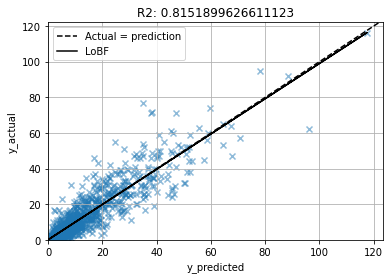


Forecasting future games: 


/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Model run  1
Model run  2
Model run  3
done.


/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
dataset = validate_and_predict(dataset, model_columns, 'total_points')

# Apply GW difficulty weights

In [14]:
dataset.loc[dataset['forecast'] == 0].groupby('difficulty')['total_points'].mean()
                              

difficulty
2    1.613369
3    1.361413
4    1.194720
5    0.875163
Name: total_points, dtype: float64

# Sense check

In [15]:
dataset.head()

,FIX_season,FIX_GW,FIX_Fixture_date,player_ID,first_name,second_name,forecast,position,team_ID,FIX_team,FIX_opponent_code,FIX_Opponent,FIX_Home?,difficulty,total_points,cost_today,cost_GW,INCOMING_team_points,INCOMING_opponent_points,INCOMING_team_goals,INCOMING_opponent_goals,INCOMING_points_diff,INCOMING_goals_diff,form,in_dreamteam,LW_cost_GW,L4W_cost_GW,L8W_cost_GW,EWMA_HL1_cost_GW,EWMA_HL2_cost_GW,EWMA_HL4_cost_GW,EWMA_HL8_cost_GW,LW_total_points,L4W_total_points,L8W_total_points,EWMA_HL1_total_points,EWMA_HL2_total_points,EWMA_HL4_total_points,EWMA_HL8_total_points,LW_goals_scored,L4W_goals_scored,L8W_goals_scored,EWMA_HL1_goals_scored,EWMA_HL2_goals_scored,EWMA_HL4_goals_scored,EWMA_HL8_goals_scored,LW_minutes,L4W_minutes,L8W_minutes,EWMA_HL1_minutes,...,LW_bps,L4W_bps,L8W_bps,EWMA_HL1_bps,EWMA_HL2_bps,EWMA_HL4_bps,EWMA_HL8_bps,LW_assists,L4W_assists,L8W_assists,EWMA_HL1_assists,EWMA_HL2_assists,EWMA_HL4_assists,EWMA_HL8_assists,LW_ict_index,L4W_ict_index,L8W_ict_index,EWMA_HL1_ict_index,EWMA_HL2_ict_index,EWMA_HL4_ict_index,EWMA_HL8_ict_index,LW_influence,L4W_influence,L8W_influence,EWMA_HL1_influence,EWMA_HL2_influence,EWMA_HL4_influence,EWMA_HL8_influence,LW_creativity,L4W_creativity,L8W_creativity,EWMA_HL1_creativity,EWMA_HL2_creativity,EWMA_HL4_creativity,EWMA_HL8_creativity,LW_threat,L4W_threat,L8W_threat,EWMA_HL1_threat,EWMA_HL2_threat,EWMA_HL4_threat,EWMA_HL8_threat,LW_clean_sheets,L4W_clean_sheets,L8W_clean_sheets,EWMA_HL1_clean_sheets,EWMA_HL2_clean_sheets,EWMA_HL4_clean_sheets,EWMA_HL8_clean_sheets,forecast_points
29381,2019-20,2,2019-08-17,274.0,Maximillian,Aarons,0,2.0,14,Norwich,13,Newcastle,1,2,1.0,42.0,45.0,1.0,3.0,1.0,4.0,-2.0,-3.0,0.9,False,45.0,45.0,45.0,45.0,45.0,45.0,45.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.000000,...,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,2.700,2.70,2.700000,2.700000,2.700000,2.700000,25.8,25.800000,25.800000,25.800000,25.800000,25.800000,25.800000,1.4,1.40,1.4,1.400000,1.400000,1.400000,1.400000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
29382,2019-20,3,2019-08-24,274.0,Maximillian,Aarons,0,2.0,14,Norwich,6,Chelsea,1,4,1.0,42.0,45.0,4.0,1.0,4.0,1.0,3.0,3.0,0.9,False,45.0,45.0,45.0,45.0,45.0,45.0,45.0,1.0,0.500000,0.500000,0.543214,0.543214,0.543214,0.521647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.000000,...,7.0,11.500000,11.500000,11.111077,11.111077,11.111077,11.305174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,3.150,3.15,3.188892,3.188892,3.188892,3.169483,4.2,15.000000,15.000000,14.066586,14.066586,14.066586,14.532418,14.2,7.80,7.8,8.353134,8.353134,8.353134,8.077086,18.0,9.000000,9.000000,9.777845,9.777845,9.777845,9.389652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
29383,2019-20,4,2019-08-31,274.0,Maximillian,Aarons,0,2.0,14,Norwich,19,West Ham,0,2,0.0,42.0,45.0,6.0,4.0,6.0,4.0,2.0,2.0,0.9,False,45.0,45.0,45.0,45.0,45.0,45.0,45.0,1.0,0.666667,0.666667,0.722486,0.722486,0.722486,0.695095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.000000,...,6.0,9.666667,9.666667,9.105163,9.105163,9.105163,9.381546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,2.800,2.80,2.761541,2.761541,2.761541,2.781694,16.6,15.533333,15.533333,15.060860,15.060860,15.060860,15.282112,2.1,5.90,5.9,5.899003,5.899003,5.899003,5.909826,2.0,6.666667,6.666667,6.725319,6.725319,6.725319,6.710203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
29384,2019-20,5,2019-09-14,274.0,Maximillian,Aarons,0,2.0,14,Norwich,11,Man City,1,4,0.0,42.0,45.0,6.0,7.0,6.0,6.0,-1.0,0.0,0.9,False,45.0,45.0,45.0,45.0,45.0,45.0,45.0,0.0,0.500000,0.500000,0.492586,0.492586,0.492586,0.498129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.000000,...,11.0,10.000000,10.000000,9.708113,9.708113,9.708113,9.840161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,3.200,3.20,3.282910,3.282910,3.282910,3.240267,11.8,14.600000,14.600000,14.023231,14.023231,14.023231,14.295400,12.3,7.50,7.5,7.935846,7.935846,7.935846,7.720584,20.0,10.000000,1

In [16]:
dataset.loc[dataset['forecast'] == 1].groupby(['second_name','first_name'])['forecast_points'].mean().sort_values(ascending = False).head(20)

second_name       first_name    
Calvert-Lewin     Dominic           6.513355
Son               Heung-Min         6.486954
Salah             Mohamed           6.383877
Kane              Harry             6.200755
Borges Fernandes  Bruno Miguel      6.173161
Wilson            Callum            6.139992
Grealish          Jack              6.135812
Chilwell          Benjamin          6.021062
James             Reece             5.828933
Mahrez            Riyad             5.816781
Vardy             Jamie             5.481145
Fabianski         Lukasz            5.474297
Zouma             Kurt              5.396574
Jota              Diogo             4.987658
Robertson         Andrew            4.979002
Aubameyang        Pierre-Emerick    4.862461
Rashford          Marcus            4.845489
Ogbonna           Angelo            4.679783
Watkins           Ollie             4.634505
Tielemans         Youri             4.614791
Name: forecast_points, dtype: float64

In [17]:
dataset.loc[dataset['second_name'] == 'Son'].loc[dataset['forecast'] == 1].head()

,FIX_season,FIX_GW,FIX_Fixture_date,player_ID,first_name,second_name,forecast,position,team_ID,FIX_team,FIX_opponent_code,FIX_Opponent,FIX_Home?,difficulty,total_points,cost_today,cost_GW,INCOMING_team_points,INCOMING_opponent_points,INCOMING_team_goals,INCOMING_opponent_goals,INCOMING_points_diff,INCOMING_goals_diff,form,in_dreamteam,LW_cost_GW,L4W_cost_GW,L8W_cost_GW,EWMA_HL1_cost_GW,EWMA_HL2_cost_GW,EWMA_HL4_cost_GW,EWMA_HL8_cost_GW,LW_total_points,L4W_total_points,L8W_total_points,EWMA_HL1_total_points,EWMA_HL2_total_points,EWMA_HL4_total_points,EWMA_HL8_total_points,LW_goals_scored,L4W_goals_scored,L8W_goals_scored,EWMA_HL1_goals_scored,EWMA_HL2_goals_scored,EWMA_HL4_goals_scored,EWMA_HL8_goals_scored,LW_minutes,L4W_minutes,L8W_minutes,EWMA_HL1_minutes,...,LW_bps,L4W_bps,L8W_bps,EWMA_HL1_bps,EWMA_HL2_bps,EWMA_HL4_bps,EWMA_HL8_bps,LW_assists,L4W_assists,L8W_assists,EWMA_HL1_assists,EWMA_HL2_assists,EWMA_HL4_assists,EWMA_HL8_assists,LW_ict_index,L4W_ict_index,L8W_ict_index,EWMA_HL1_ict_index,EWMA_HL2_ict_index,EWMA_HL4_ict_index,EWMA_HL8_ict_index,LW_influence,L4W_influence,L8W_influence,EWMA_HL1_influence,EWMA_HL2_influence,EWMA_HL4_influence,EWMA_HL8_influence,LW_creativity,L4W_creativity,L8W_creativity,EWMA_HL1_creativity,EWMA_HL2_creativity,EWMA_HL4_creativity,EWMA_HL8_creativity,LW_threat,L4W_threat,L8W_threat,EWMA_HL1_threat,EWMA_HL2_threat,EWMA_HL4_threat,EWMA_HL8_threat,LW_clean_sheets,L4W_clean_sheets,L8W_clean_sheets,EWMA_HL1_clean_sheets,EWMA_HL2_clean_sheets,EWMA_HL4_clean_sheets,EWMA_HL8_clean_sheets,forecast_points
37076,2020-21,11,2020-12-06,390.0,Heung-Min,Son,1,3.0,17,Spurs,1,Arsenal,1,3,3.0,95.0,95.0,21.0,19.0,21.0,22.0,2.0,-1.0,5.3,True,95.0,95.0,92.75,94.214892,94.214892,94.214892,94.987927,3.0,6.5,10.25,7.805149,7.805149,7.805149,7.023164,0.0,0.5,1.125,0.716604,0.716604,0.716604,0.635439,90.0,88.5,80.0,81.222138,...,12.0,19.0,32.875,24.350481,24.350481,24.350481,22.260362,0.0,0.0,0.25,0.219468,0.219468,0.219468,0.258051,2.0,6.75,11.6,9.05088,9.05088,9.05088,8.731549,2.8,23.95,49.1,35.01437,35.01437,35.01437,32.418477,12.9,11.825,25.675,20.986837,20.986837,20.986837,20.810102,4.0,31.5,41.0,34.289354,34.289354,34.289354,33.95127,1.0,0.75,0.5,0.526185,0.526185,0.526185,0.399465,6.441579
37077,2020-21,12,2020-12-13,390.0,Heung-Min,Son,1,3.0,17,Spurs,6,Crystal Palace,0,3,3.0,95.0,95.0,21.0,19.0,21.0,22.0,2.0,-1.0,5.3,True,95.0,95.0,92.75,94.214892,94.214892,94.214892,94.987927,3.0,6.5,10.25,7.805149,7.805149,7.805149,7.023164,0.0,0.5,1.125,0.716604,0.716604,0.716604,0.635439,90.0,88.5,80.0,81.222138,...,12.0,19.0,32.875,24.350481,24.350481,24.350481,22.260362,0.0,0.0,0.25,0.219468,0.219468,0.219468,0.258051,2.0,6.75,11.6,9.05088,9.05088,9.05088,8.731549,2.8,23.95,49.1,35.01437,35.01437,35.01437,32.418477,12.9,11.825,25.675,20.986837,20.986837,20.986837,20.810102,4.0,31.5,41.0,34.289354,34.289354,34.289354,33.95127,1.0,0.75,0.5,0.526185,0.526185,0.526185,0.399465,6.345433
37078,2020-21,13,2020-12-16,390.0,Heung-Min,Son,1,3.0,17,Spurs,11,Liverpool,0,5,3.0,95.0,95.0,21.0,19.0,21.0,22.0,2.0,-1.0,5.3,True,95.0,95.0,92.75,94.214892,94.214892,94.214892,94.987927,3.0,6.5,10.25,7.805149,7.805149,7.805149,7.023164,0.0,0.5,1.125,0.716604,0.716604,0.716604,0.635439,90.0,88.5,80.0,81.222138,...,12.0,19.0,32.875,24.350481,24.350481,24.350481,22.260362,0.0,0.0,0.25,0.219468,0.219468,0.219468,0.258051,2.0,6.75,11.6,9.05088,9.05088,9.05088,8.731549,2.8,23.95,49.1,35.01437,35.01437,35.01437,32.418477,12.9,11.825,25.675,20.986837,20.986837,20.986837,20.810102,4.0,31.5,41.0,34.289354,34.289354,34.289354,33.95127,1.0,0.75,0.5,0.526185,0.526185,0.526185,0.399465,6.135937
37079,2020-21,14,2020-12-20,390.0,Heung-Min,Son,1,3.0,17,Spurs,9,Leicester,1,4,3.0,95.0,95.0,21.0,19.0,21.0,22.0,2.0,-1.0,5.3,True,95.0,95.0,92.75,94.214892,94.214892,94.214892,94.987927,3.0,6.5,10.25,7.805149,7.805149,7.805149,7.023164,0.0,0.5,1.125,0.716604,0.716604,0.716604,0.635439,90.0,88.5,80.0,81.222138,...,12.0,19.0,32.875,24.350481,24.350481,24.350481,22

# Output forecast

In [18]:
dataset.to_csv(latest_file_address,index = False)